In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib notebook
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn import svm
from yellowbrick.classifier import ClassificationReport,ClassPredictionError,ConfusionMatrix

In [5]:
data = np.loadtxt('semeion.data')
random.seed(4)
random.shuffle(data)
x = data[:, :256]
imgs = x.reshape((-1, 1, 16, 16))
y = data[:, 256:]
y = np.where(y == 1)[1]

pca = PCA(n_components=256)

trainX = x[:1000]
d_tr = pca.fit_transform(trainX)
trainY = y[:1000]

testX = x[1000:]
d_te = pca.fit_transform(testX)
testY = y[1000:]

# training and testing error using PCA
clf = DecisionTreeClassifier()
clf.fit(d_tr, trainY)

p = clf.predict(d_tr)
print('Train error: ', 1- np.sum(p == trainY)/len(trainY))

p = clf.predict(d_te)
print('Test error: ', 1- np.sum(p == testY)/len(testY))

Train error:  0.0
Test error:  0.7234401349072512


<IPython.core.display.Javascript object>


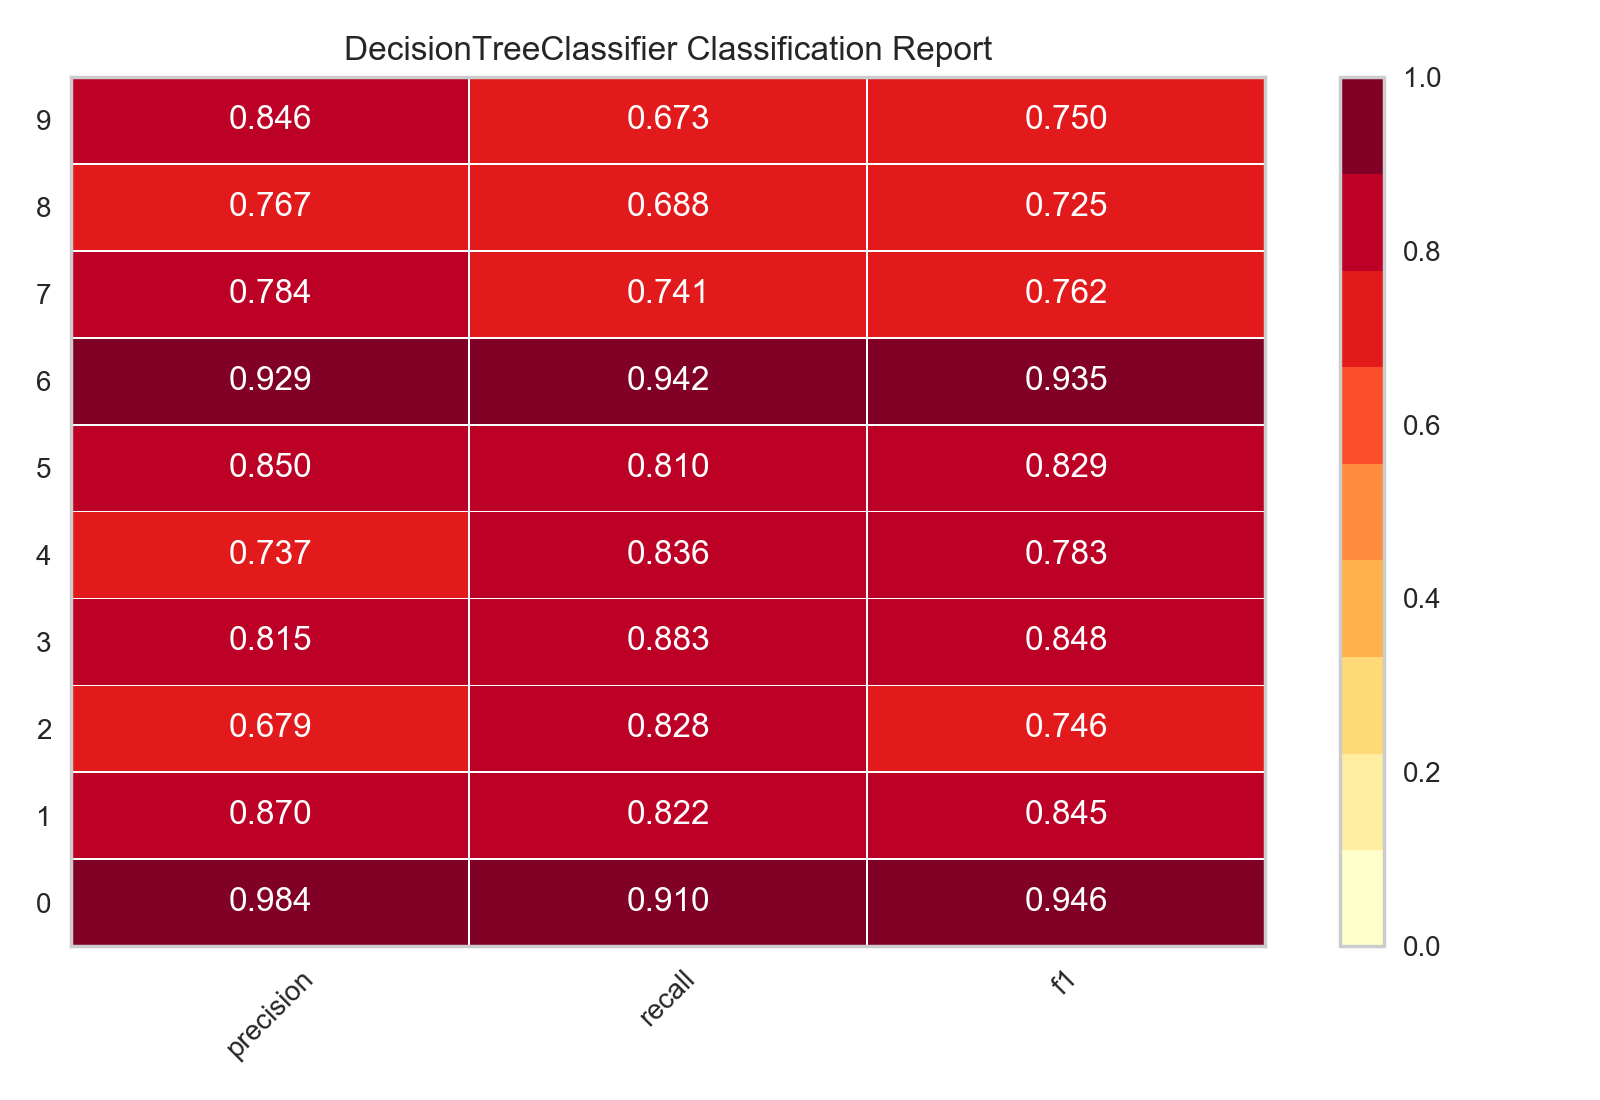

In [6]:
# training and testing error using the original data using Decision Tree

clf = DecisionTreeClassifier()
visuallizer = ClassificationReport(clf)
visuallizer.fit(trainX, trainY)

visuallizer.score(testX,testY)
visuallizer.poof()

#p = clf.predict(trainX)
#print("Decision Tree Train Error: ", 1- np.sum(p == trainY)/len(trainY))

#p = clf.predict(testX)
#print("Decision Tree Test Error: ", 1-np.sum(p == testY)/len(testY))

<IPython.core.display.Javascript object>


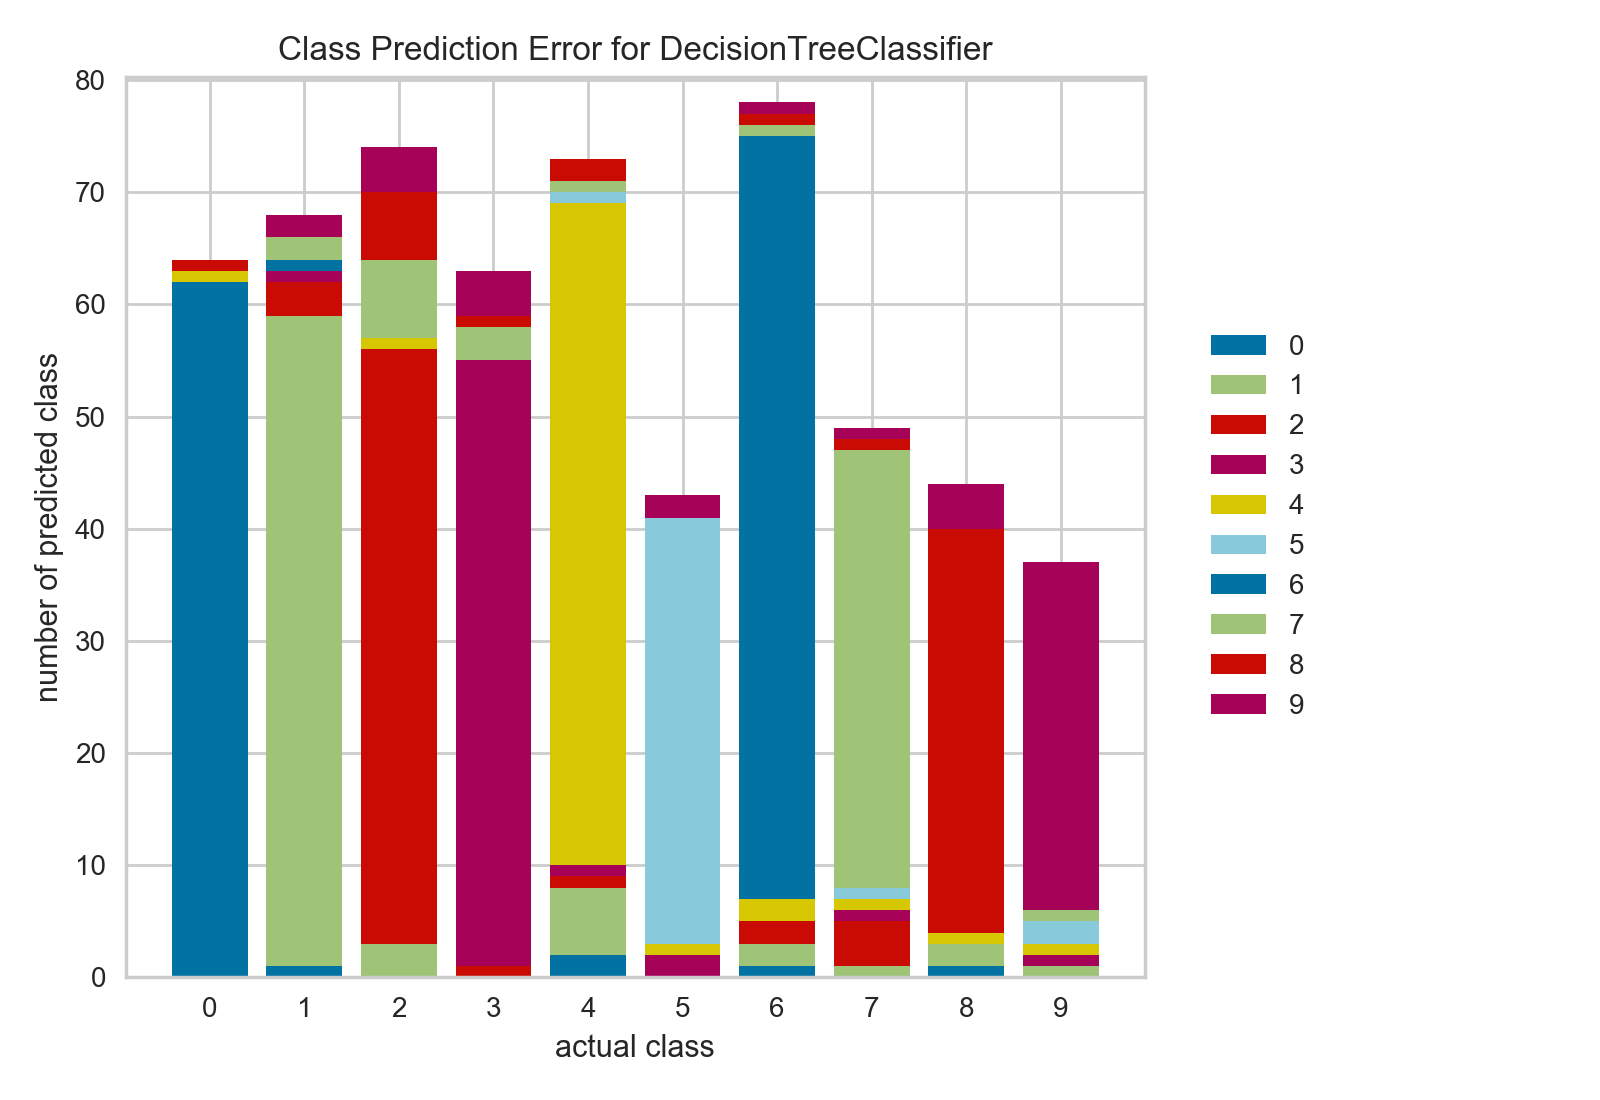

In [7]:
clf = DecisionTreeClassifier()
visuallizer = ClassPredictionError(clf)
visuallizer.fit(trainX, trainY)

visuallizer.score(testX,testY)
visuallizer.poof()

<IPython.core.display.Javascript object>


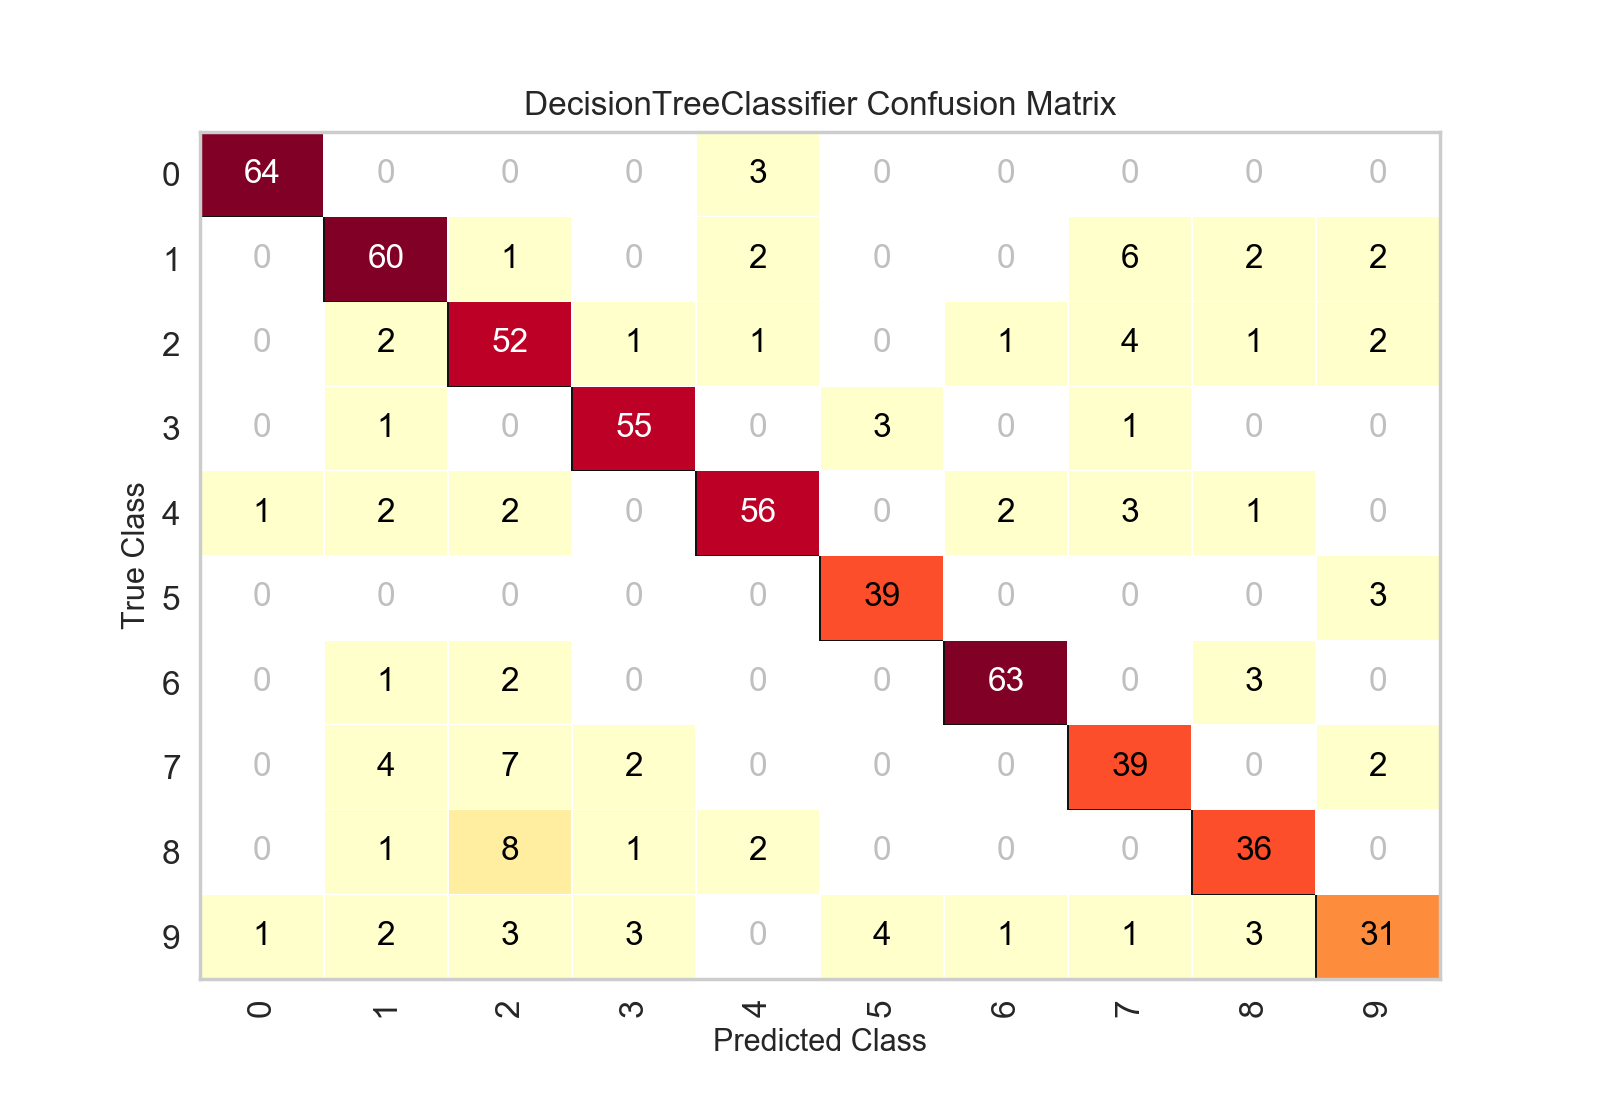

In [8]:
clf = DecisionTreeClassifier()
classes = range(10)
visuallizer = ConfusionMatrix(clf,classes=classes)
visuallizer.fit(trainX, trainY)

visuallizer.score(testX,testY)
visuallizer.poof()

In [ ]:
km = KMeans(n_clusters=3)
km.fit(data[:, :256])

In [ ]:
c0 = np.where(km.labels_ == 0)[0]
cl0 = y[c0]
print("0: ", np.sum(cl0 == 0))
print("1: ", np.sum(cl0 == 1))
print("2: ", np.sum(cl0 == 2))
print("3: ", np.sum(cl0 == 3))
print("4: ", np.sum(cl0 == 4))
print("5: ", np.sum(cl0 == 5))
print("6: ", np.sum(cl0 == 6))
print("7: ", np.sum(cl0 == 7))
print("8: ", np.sum(cl0 == 8))
print("9: ", np.sum(cl0 == 9))

In [ ]:
c1 = np.where(km.labels_ == 1)[0]
cl1 = y[c1]
print("0: ", np.sum(cl1 == 0))
print("1: ", np.sum(cl1 == 1))
print("2: ", np.sum(cl1 == 2))
print("3: ", np.sum(cl1 == 3))
print("4: ", np.sum(cl1 == 4))
print("5: ", np.sum(cl1 == 5))
print("6: ", np.sum(cl1 == 6))
print("7: ", np.sum(cl1 == 7))
print("8: ", np.sum(cl1 == 8))
print("9: ", np.sum(cl1 == 9))

In [ ]:
c2 = np.where(km.labels_ == 2)[0]
cl2 = y[c2]
print("0: ", np.sum(cl2 == 0))
print("1: ", np.sum(cl2 == 1))
print("2: ", np.sum(cl2 == 2))
print("3: ", np.sum(cl2 == 3))
print("4: ", np.sum(cl2 == 4))
print("5: ", np.sum(cl2 == 5))
print("6: ", np.sum(cl2 == 6))
print("7: ", np.sum(cl2 == 7))
print("8: ", np.sum(cl2 == 8))
print("9: ", np.sum(cl2 == 9))

1 ____ 0.9561551433389545
2 ____ 0.9527824620573356
3 ____ 0.9561551433389545
4 ____ 0.9527824620573356
5 ____ 0.9561551433389545
6 ____ 0.9561551433389545
7 ____ 0.9578414839797639
8 ____ 0.9561551433389545
9 ____ 0.9561551433389545


<IPython.core.display.Javascript object>


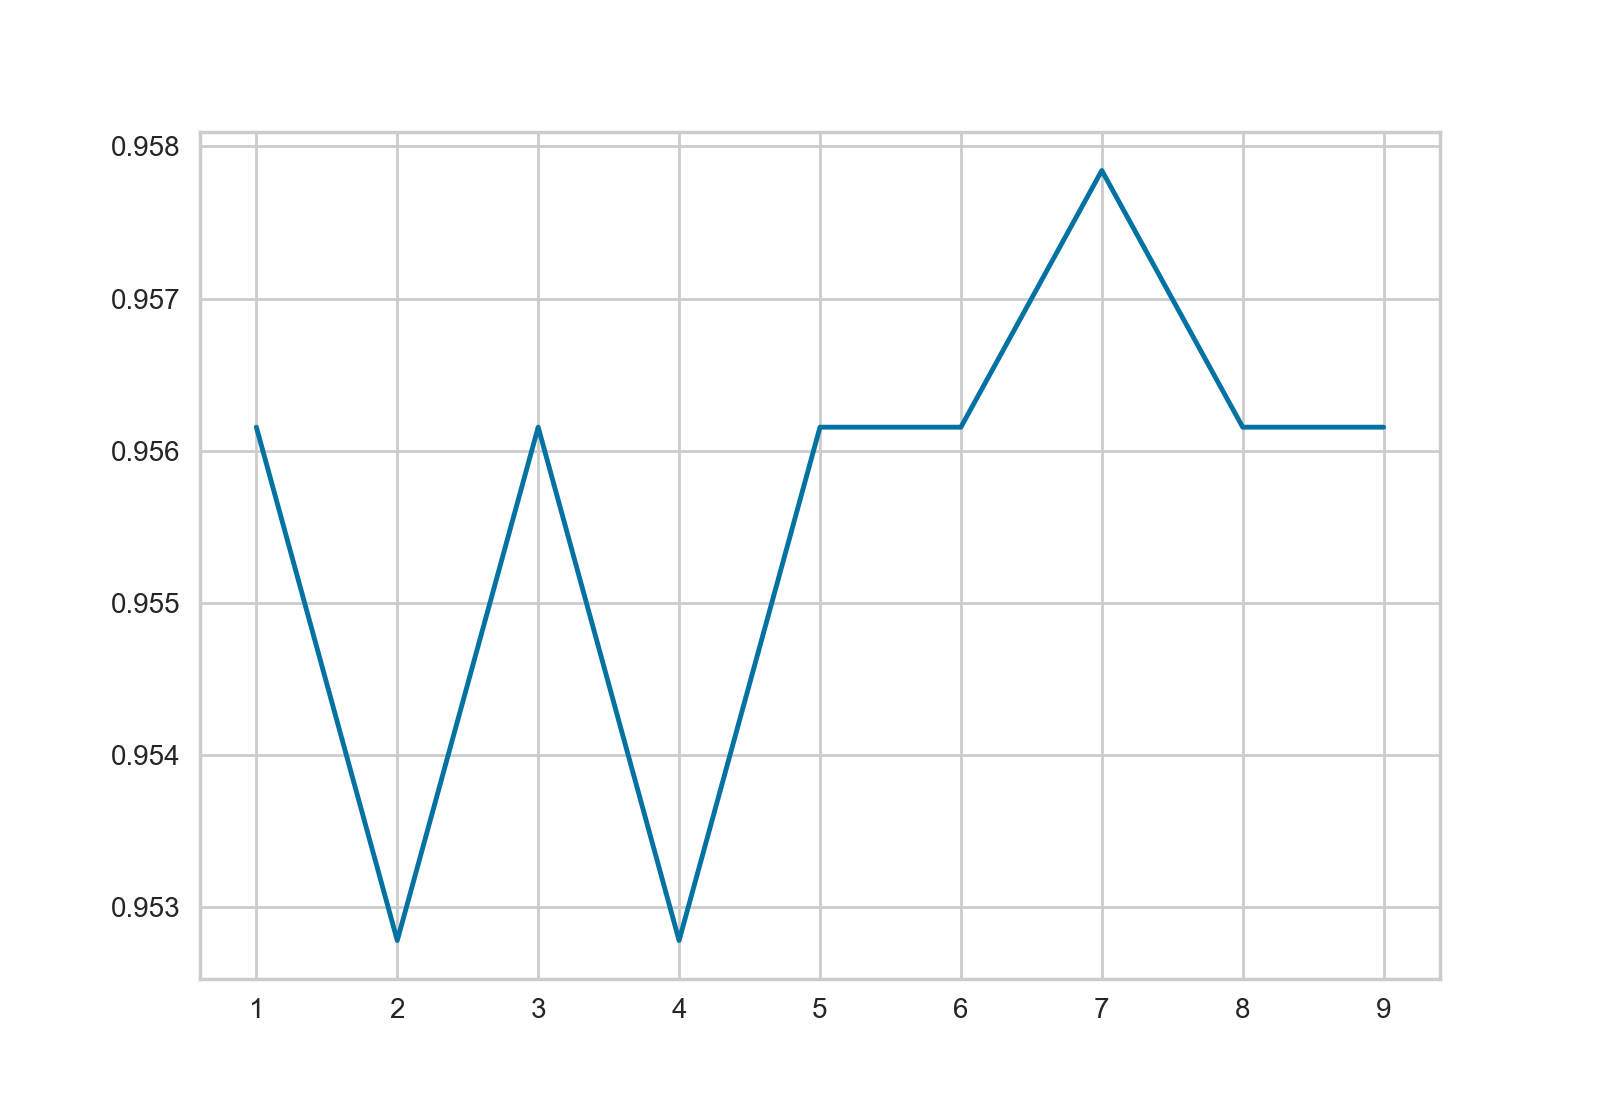

In [9]:
rfc_test = []
for i in range( 1, 10 ):
    clf_rf = RandomForestClassifier(n_estimators=i*100, max_depth=10, min_samples_split=10, random_state=89789)
    clf_rf.fit(trainX, trainY)
    rfc_test.append(np.sum(clf_rf.predict(testX) == testY)/len(testY))
    print(i, "____", np.sum(clf_rf.predict(testX) == testY)/len(testY))

plt.plot(np.arange(1,10),np.array(rfc_test))
plt.show()

1 ____ 0.33558178752107926
2 ____ 0.5801011804384486
3 ____ 0.7116357504215851
4 ____ 0.8178752107925801
5 ____ 0.8903878583473862
6 ____ 0.9409780775716695
7 ____ 0.9409780775716695
8 ____ 0.954468802698145
9 ____ 0.9561551433389545
10 ____ 0.9578414839797639
11 ____ 0.9561551433389545
12 ____ 0.9561551433389545
13 ____ 0.9561551433389545
14 ____ 0.9561551433389545
15 ____ 0.9561551433389545
16 ____ 0.9561551433389545
17 ____ 0.9561551433389545
18 ____ 0.9561551433389545
19 ____ 0.9561551433389545


<IPython.core.display.Javascript object>


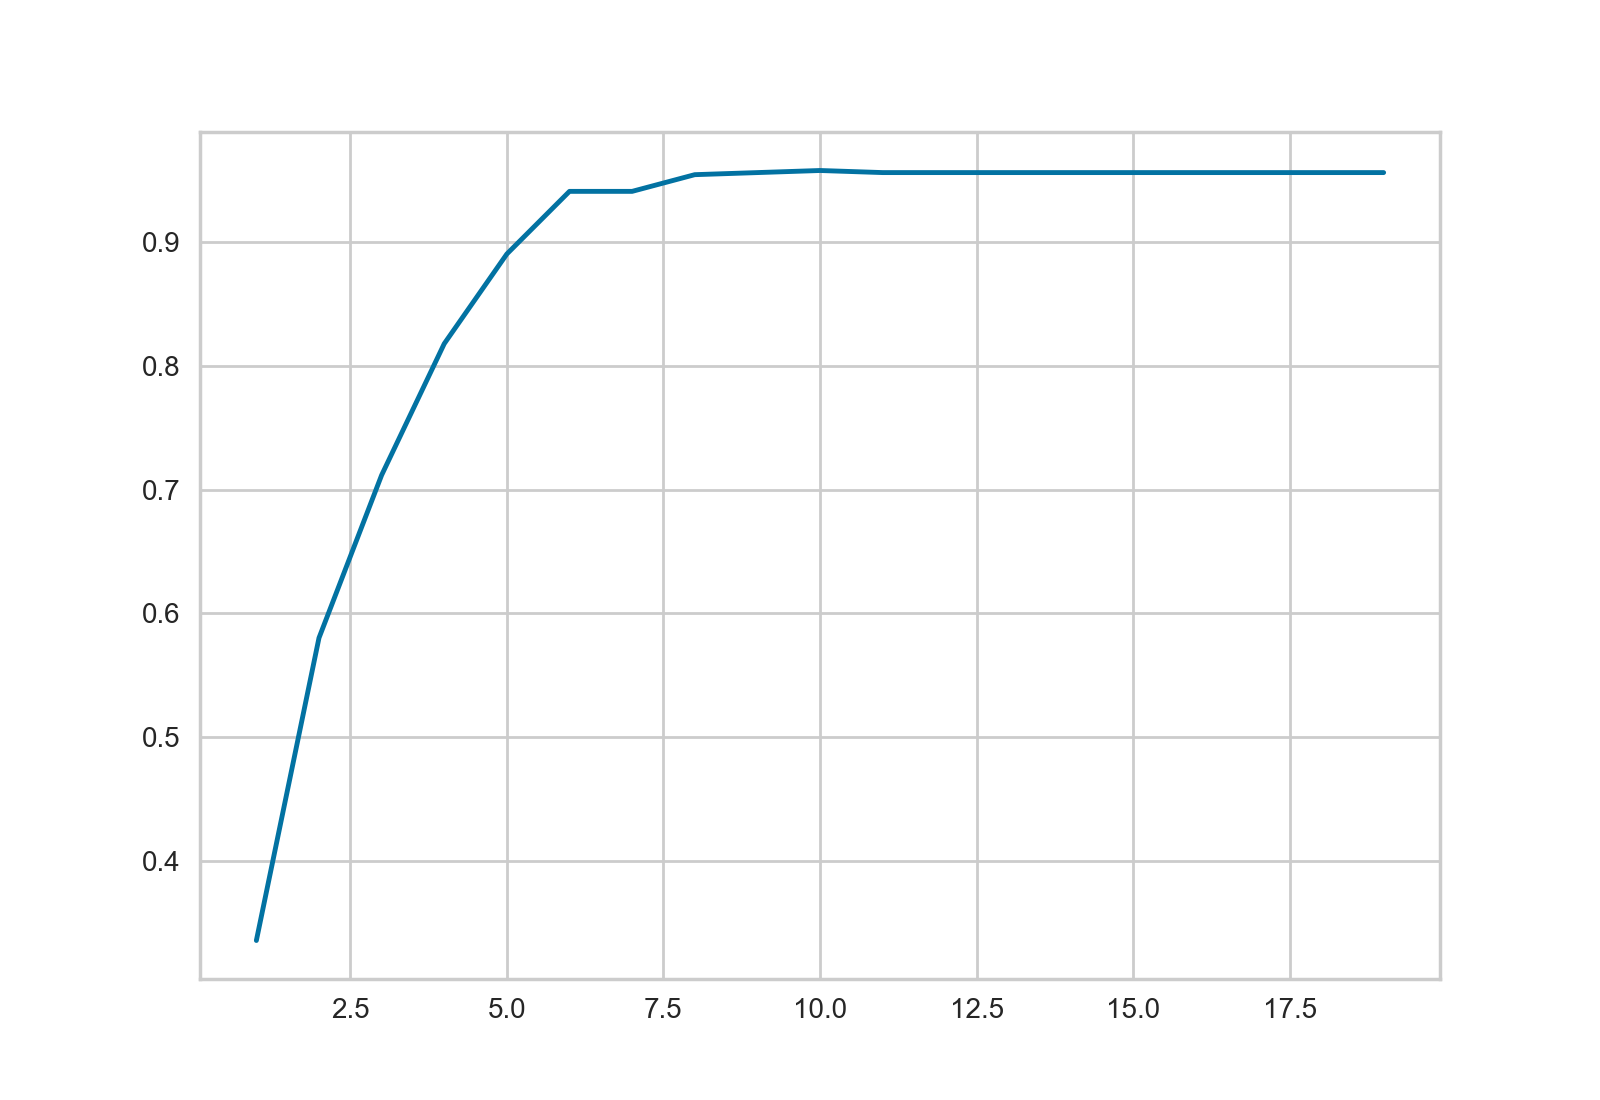

In [10]:
rfc_test = []
for i in range( 1, 20 ):
    clf_rf = RandomForestClassifier(n_estimators=700, max_depth=i, min_samples_split=10, random_state=89789)
    clf_rf.fit(trainX, trainY)
    rfc_test.append(np.sum(clf_rf.predict(testX) == testY)/len(testY))
    print(i, "____", np.sum(clf_rf.predict(testX) == testY)/len(testY))
plt.plot(np.arange(1,20),np.array(rfc_test))
plt.show()

2 ____ 0.954468802698145
3 ____ 0.9595278246205734
4 ____ 0.9578414839797639
5 ____ 0.9561551433389545
6 ____ 0.9612141652613828
7 ____ 0.9561551433389545
8 ____ 0.9561551433389545
9 ____ 0.9578414839797639
10 ____ 0.9578414839797639
11 ____ 0.9561551433389545
12 ____ 0.9527824620573356
13 ____ 0.9612141652613828
14 ____ 0.9578414839797639
15 ____ 0.9510961214165261
16 ____ 0.9527824620573356
17 ____ 0.9561551433389545
18 ____ 0.9578414839797639
19 ____ 0.9494097807757167


<IPython.core.display.Javascript object>


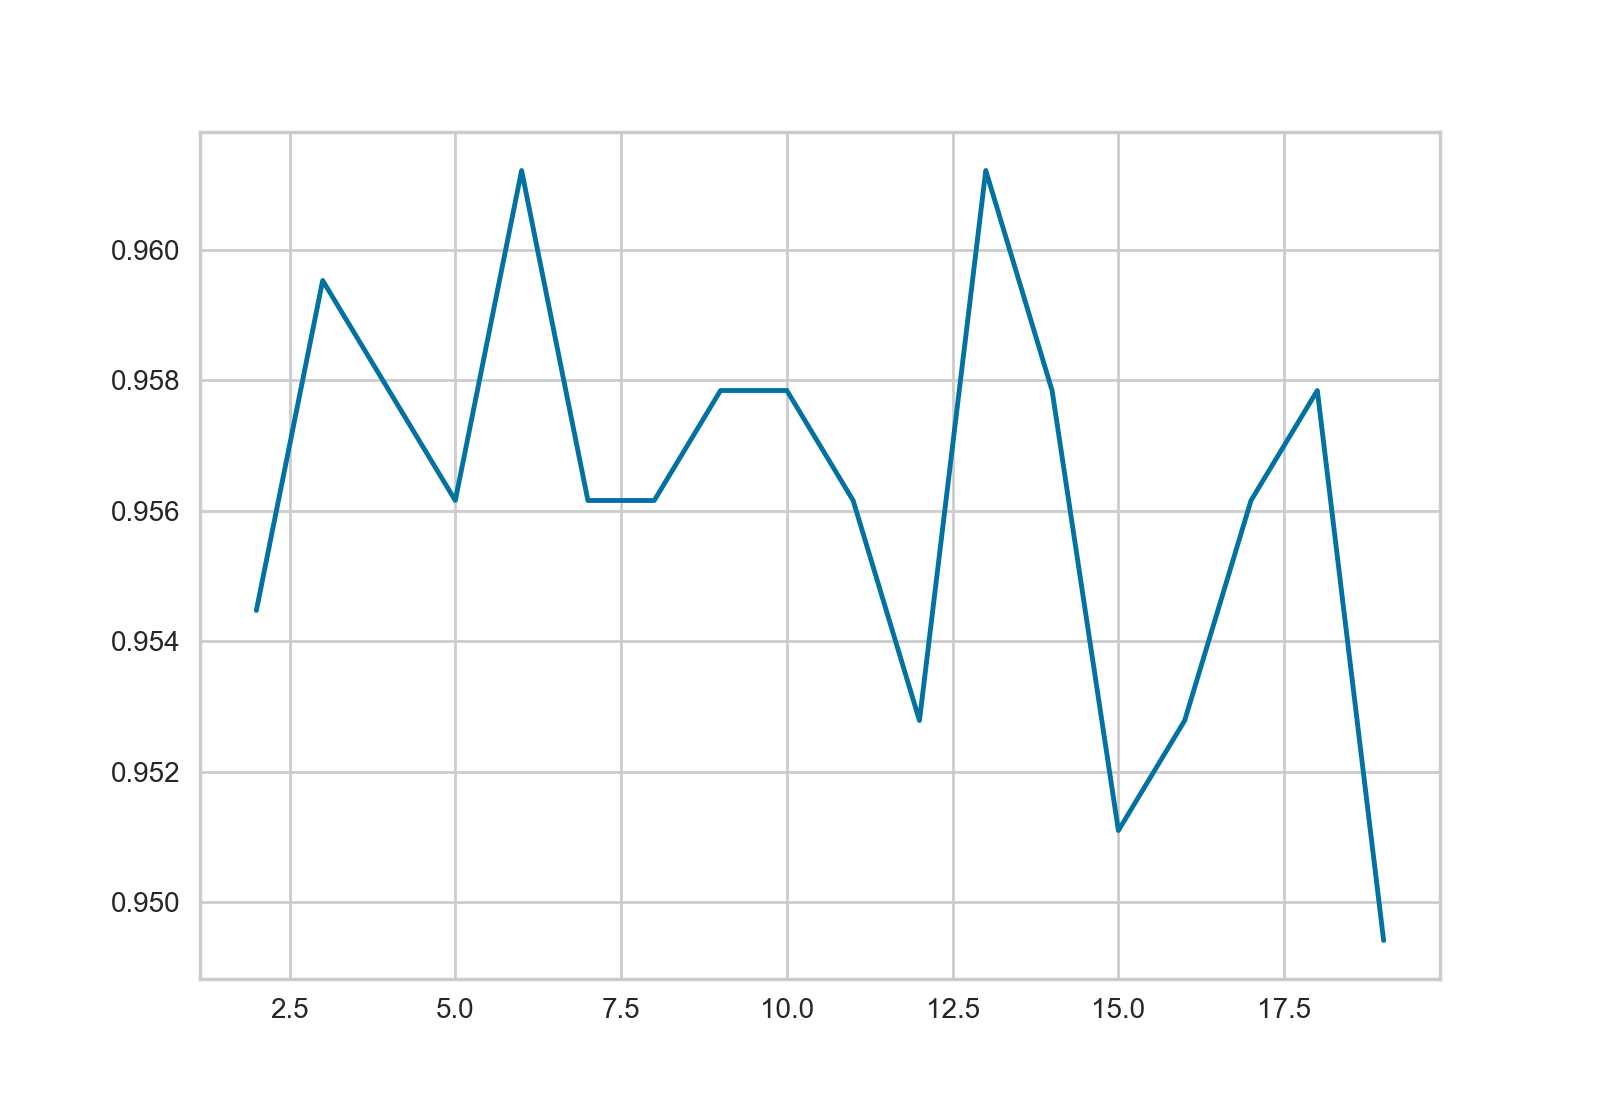

In [12]:
rfc_test = []
for i in range( 2, 20 ):
    clf_rf = RandomForestClassifier(n_estimators=700, max_depth=10, min_samples_split=i, random_state=89789)
    clf_rf.fit(trainX, trainY)
    rfc_test.append(np.sum(clf_rf.predict(testX) == testY)/len(testY))
    print(i, "____", np.sum(clf_rf.predict(testX) == testY)/len(testY))

plt.plot(np.arange(2,20),np.array(rfc_test))
plt.show()

In [15]:
clf_rf = RandomForestClassifier(n_estimators=700, max_depth=10, min_samples_split=6, random_state=89789)
clf_rf.fit(trainX, trainY)
print(np.sum(clf_rf.predict(trainX) == trainY)/len(trainY), np.sum(clf_rf.predict(testX) == testY)/len(testY))

1.0 0.9612141652613828


<IPython.core.display.Javascript object>


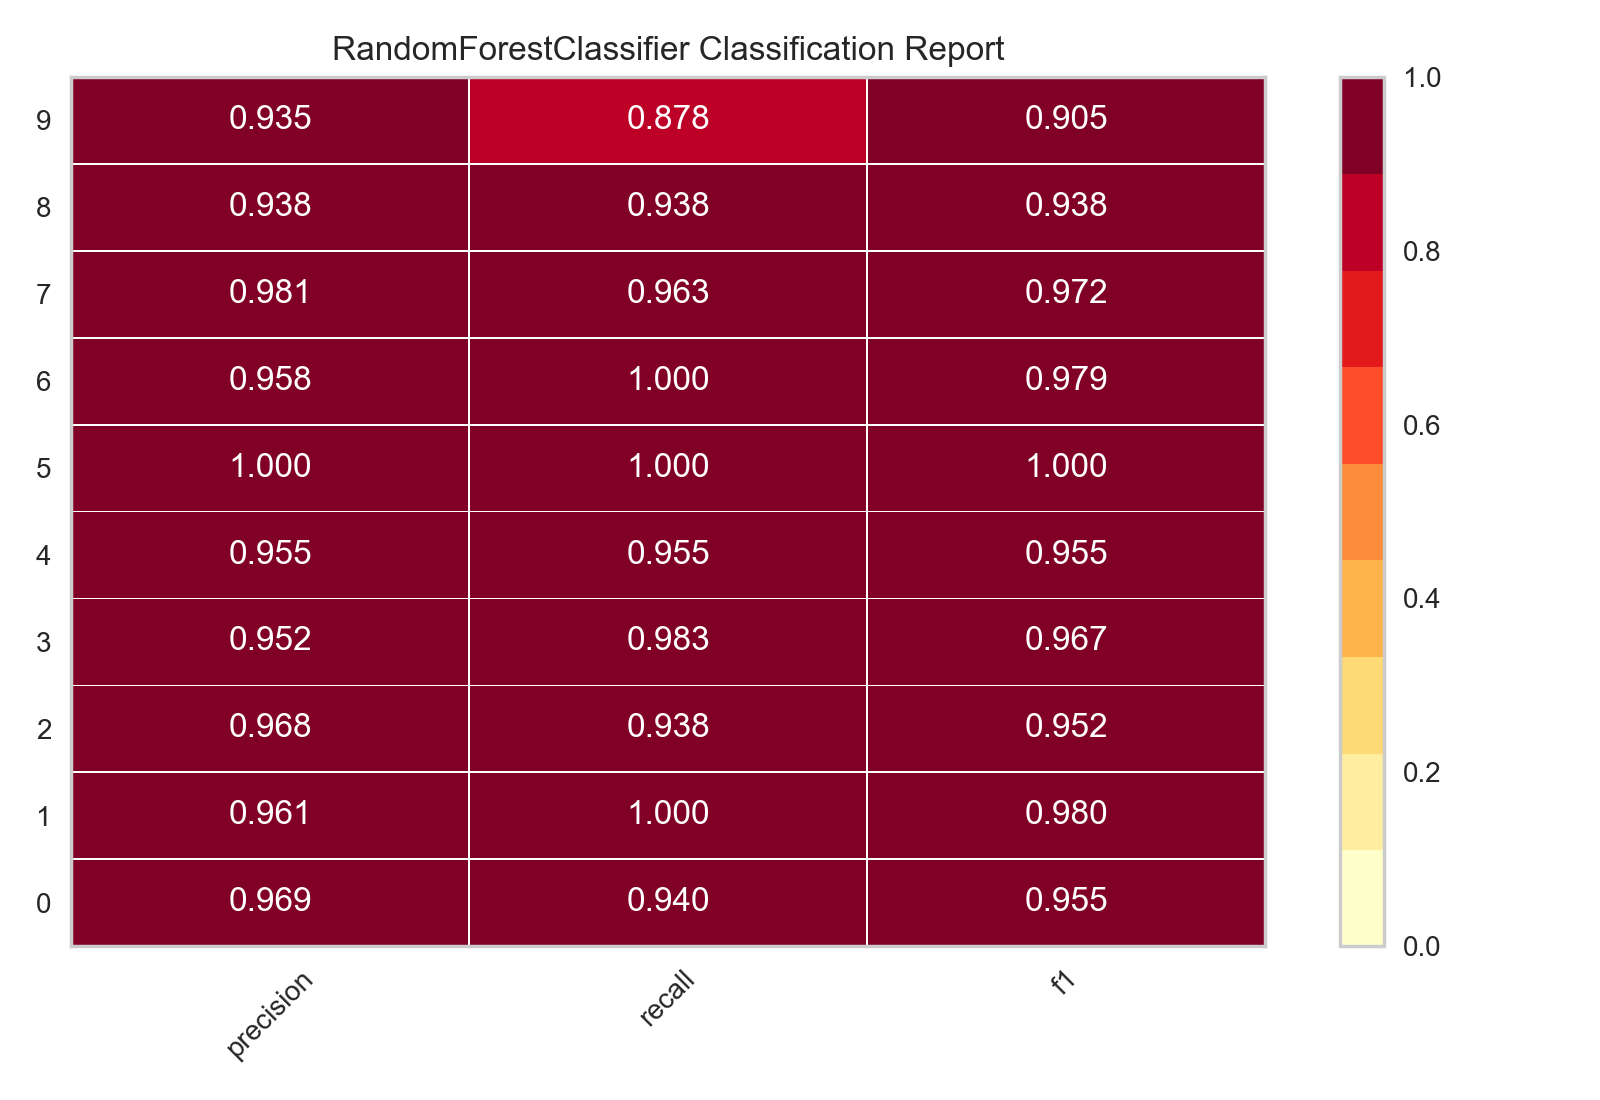

In [16]:
clf_rf = RandomForestClassifier(n_estimators=700, max_depth=10, min_samples_split=6, random_state=89789)
visuallizer = ClassificationReport(clf_rf)
visuallizer.fit(trainX, trainY)
visuallizer.score(testX,testY)
visuallizer.poof()

<IPython.core.display.Javascript object>


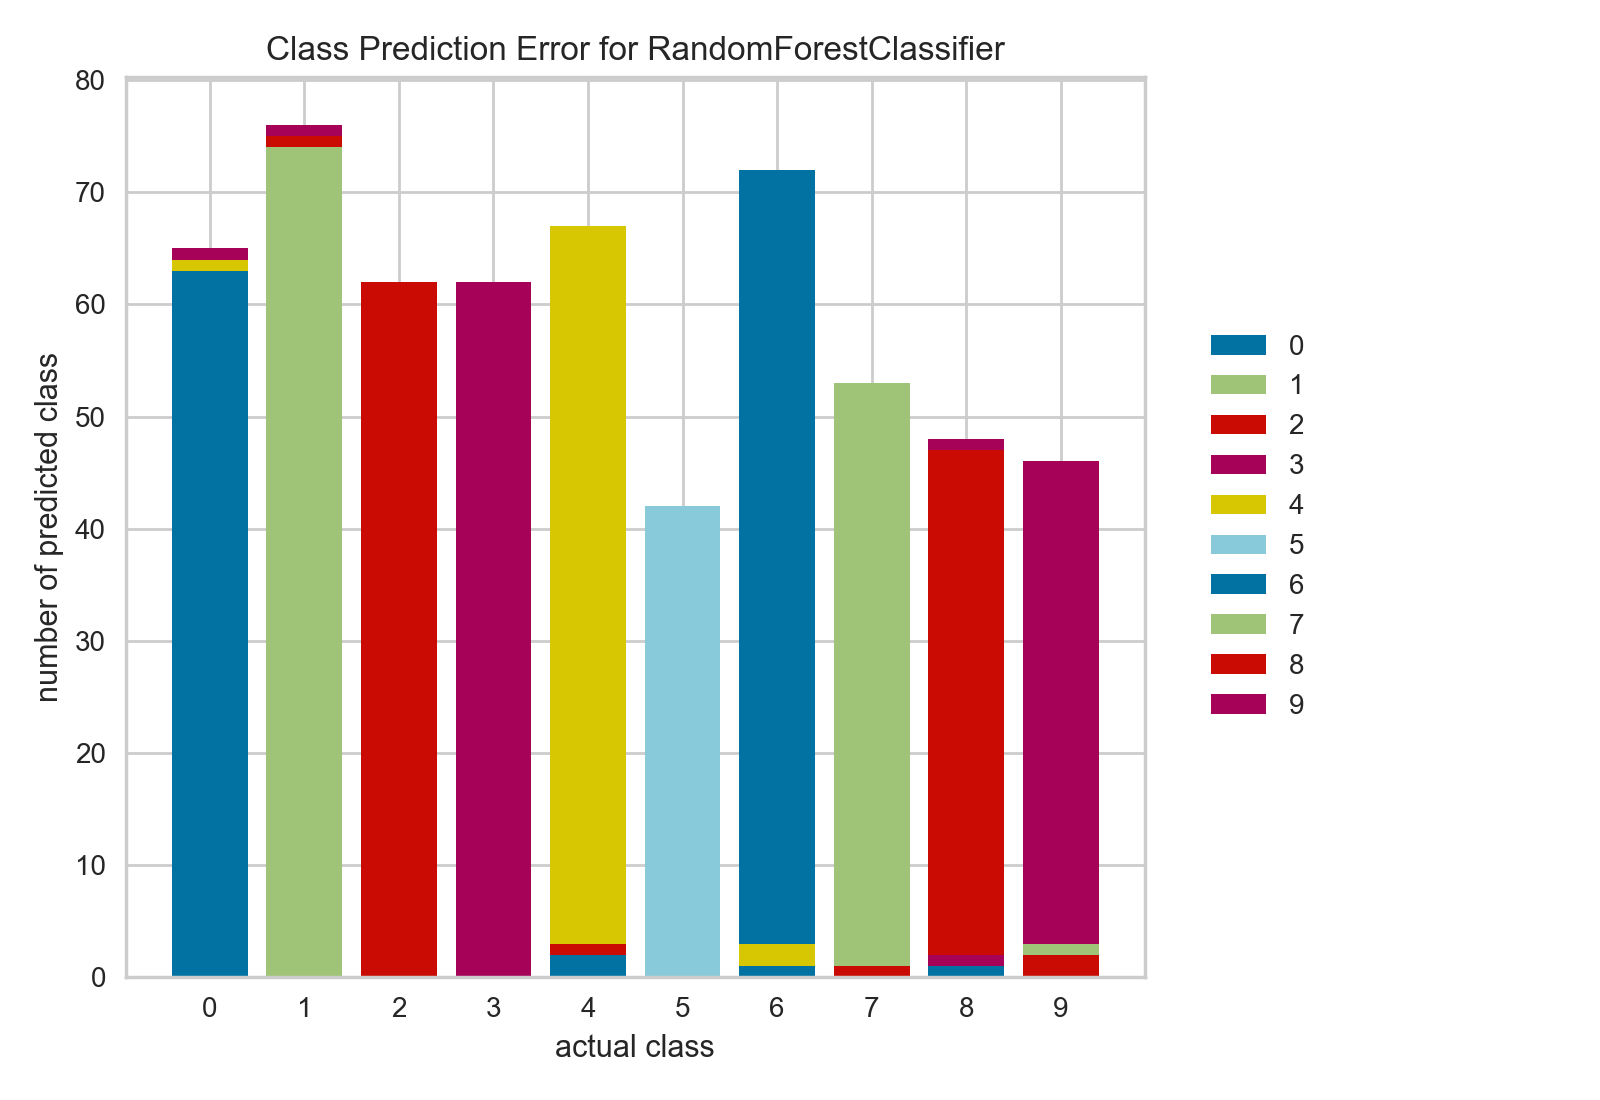

In [18]:
clf = RandomForestClassifier(n_estimators=700, max_depth=10, min_samples_split=6, random_state=89789)
visuallizer = ClassPredictionError(clf)
visuallizer.fit(trainX, trainY)
visuallizer.score(testX,testY)
visuallizer.poof()

<IPython.core.display.Javascript object>


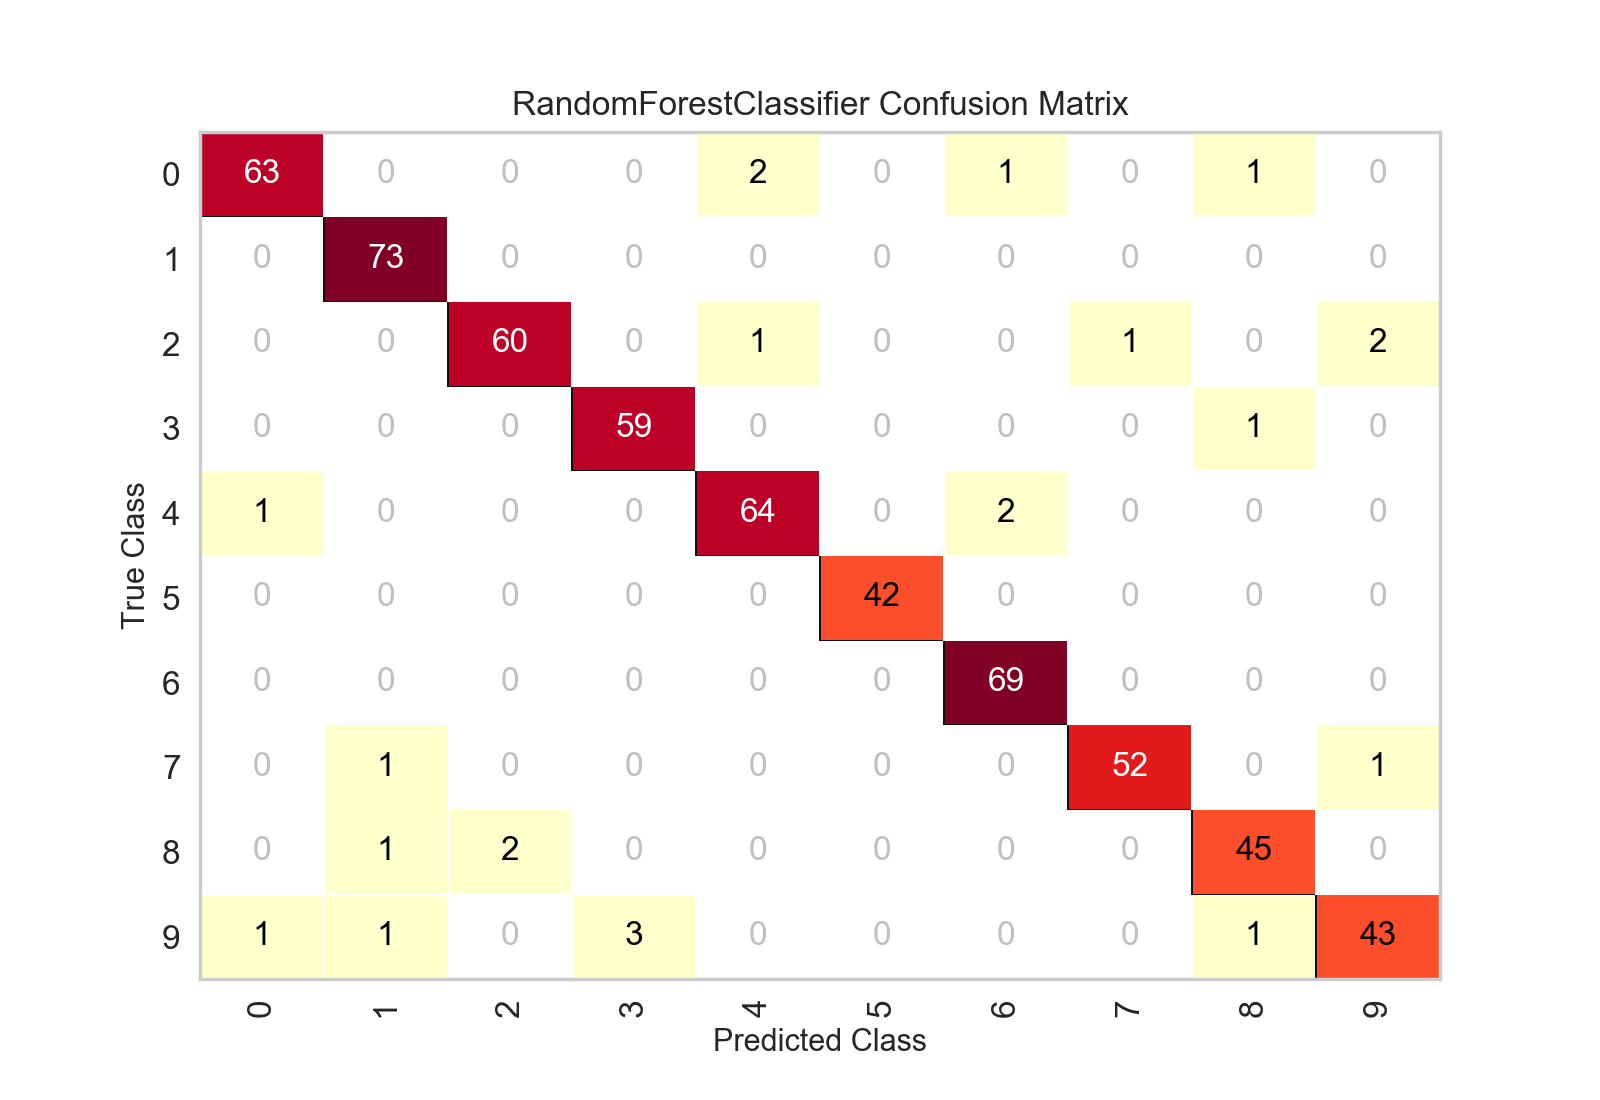

In [17]:
clf = RandomForestClassifier(n_estimators=700, max_depth=10, min_samples_split=6, random_state=89789)
classes = range(10)
visuallizer = ConfusionMatrix(clf,classes=classes)
visuallizer.fit(trainX, trainY)
visuallizer.score(testX,testY)
visuallizer.poof()

In [27]:
svc_model = svm.SVC(kernel='rbf')
svc = svc_model.fit(trainX, trainY)
print(svc.fit(trainX, trainY).score(trainX, trainY))
print(svc.fit(trainX, trainY).score(testX, testY))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.989


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9477234401349073


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<IPython.core.display.Javascript object>


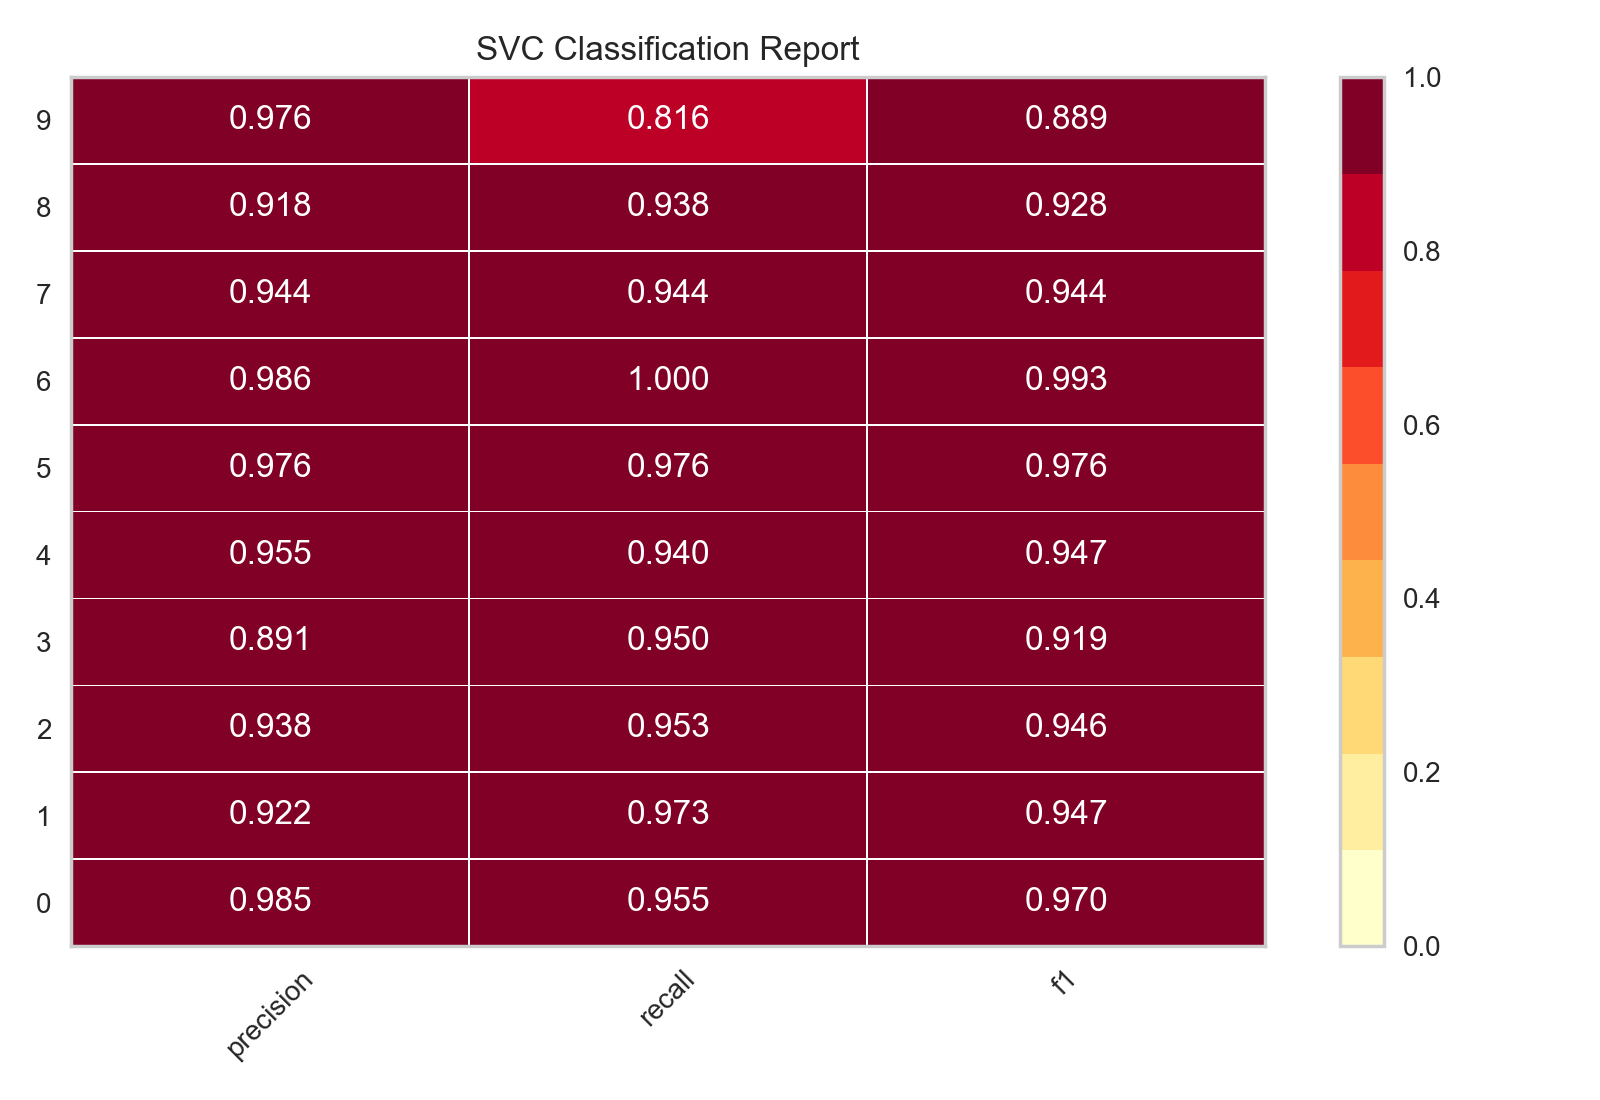

In [28]:
clf_svm = svm.SVC(kernel='rbf')

visuallizer = ClassificationReport(clf_svm)
visuallizer.fit(trainX, trainY)
visuallizer.score(testX,testY)
visuallizer.poof()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<IPython.core.display.Javascript object>


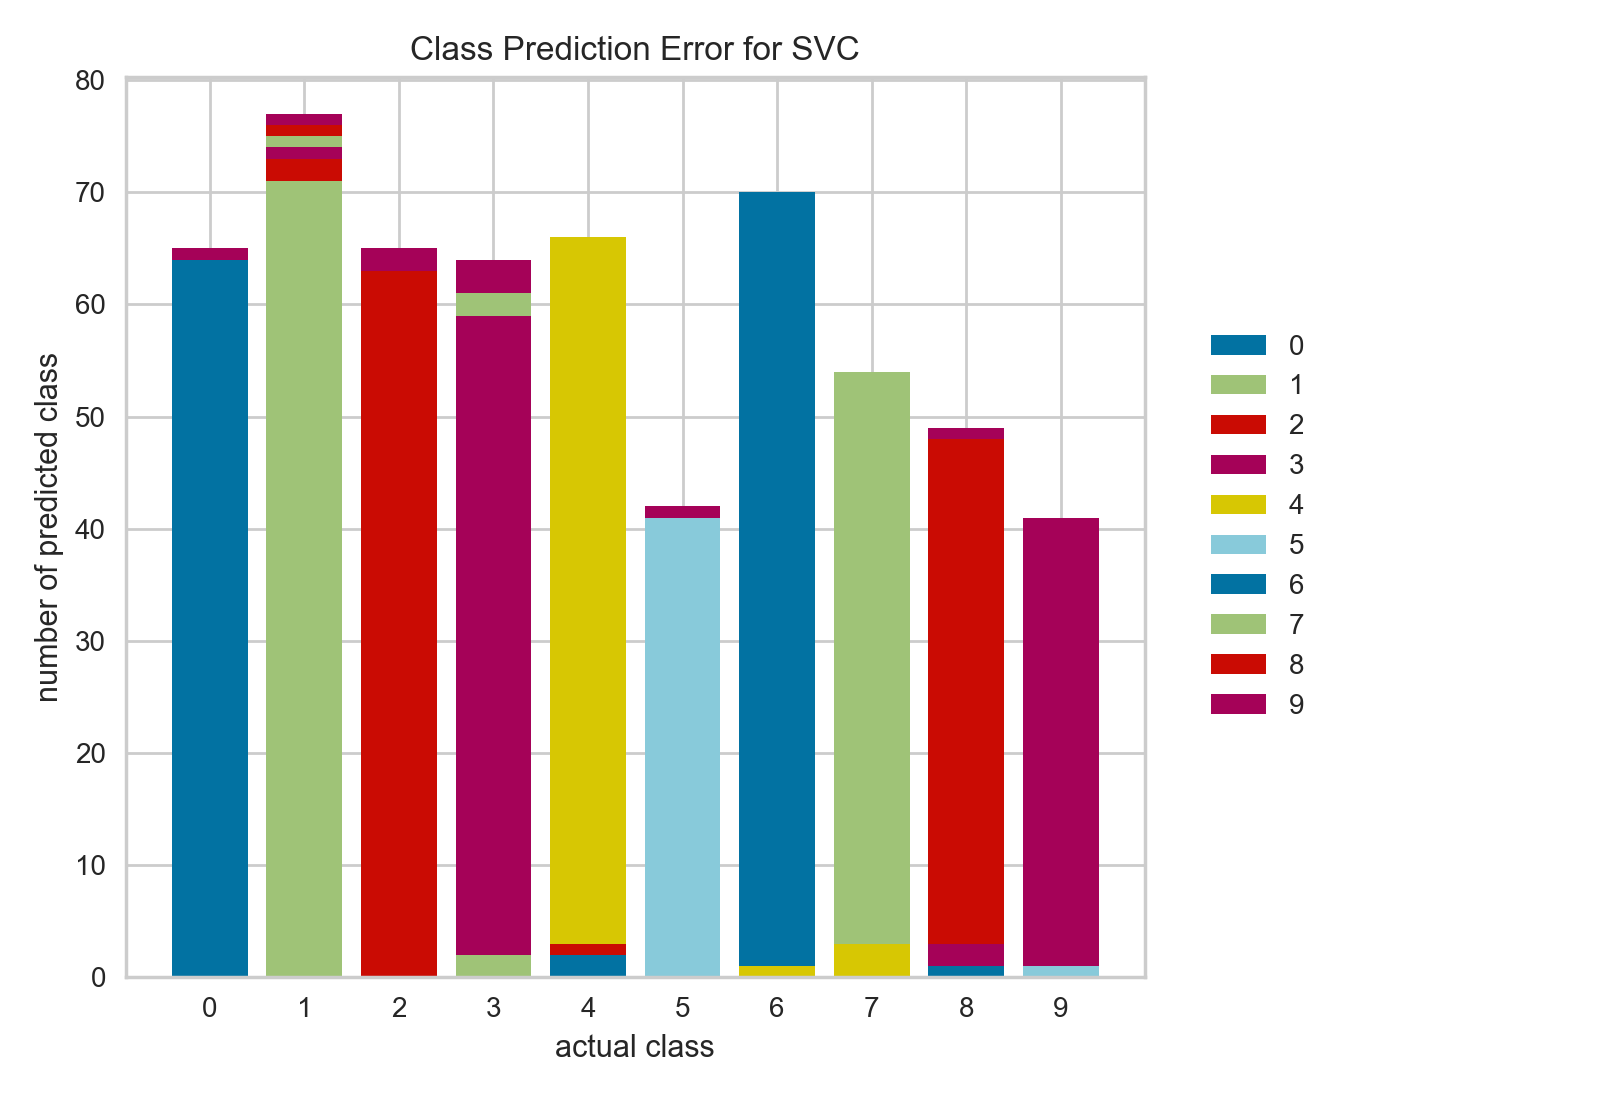

In [29]:
clf_svm2 = svm.SVC(kernel='rbf')
visuallizer = ClassPredictionError(clf_svm2)
visuallizer.fit(trainX, trainY)
visuallizer.score(testX,testY)
visuallizer.poof()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<IPython.core.display.Javascript object>


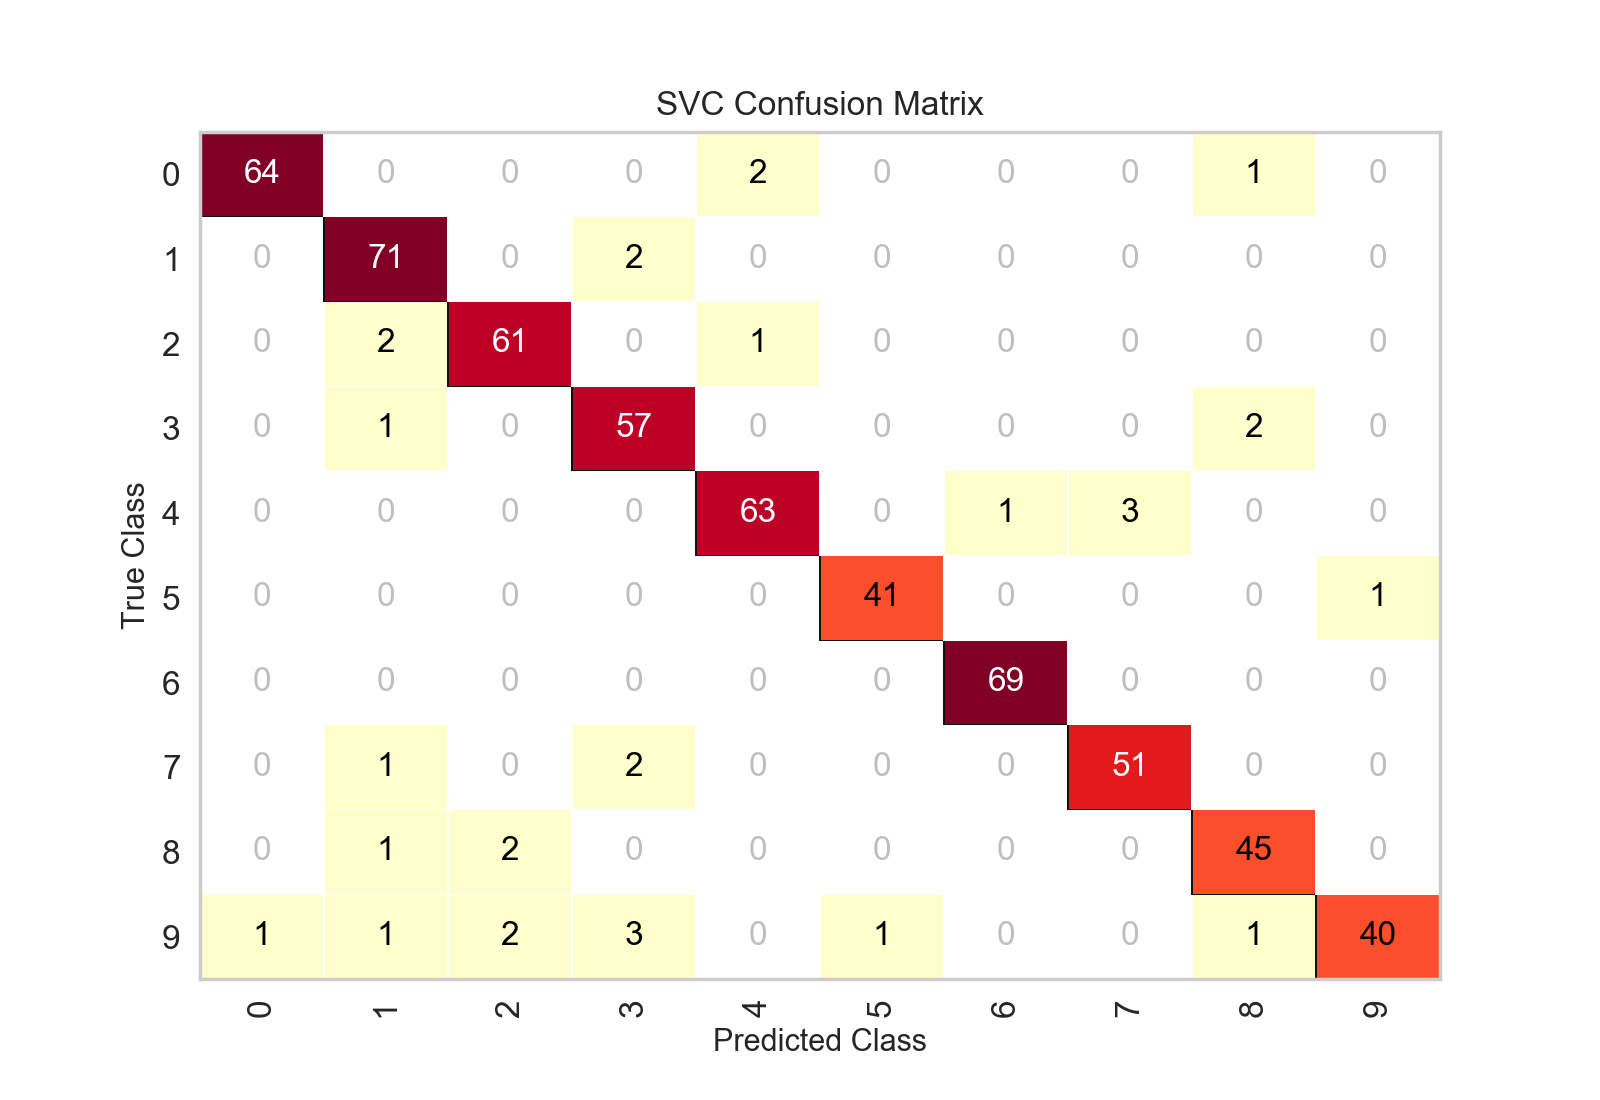

In [30]:
clf_svm2 = svm.SVC(kernel='rbf')
classes = range(10)
visuallizer = ConfusionMatrix(clf_svm2,classes=classes)
visuallizer.fit(trainX, trainY)
visuallizer.score(testX,testY)
visuallizer.poof()

In [ ]:
"""
0.411 0.33220910623946037 1
0.617 0.554806070826307 2
0.787 0.7335581787521079 3
0.914 0.8718381112984823 4
0.959 0.8988195615514334 5
0.98 0.9224283305227656 6
0.983 0.9342327150084317 7
0.993 0.9494097807757167 8
0.994 0.9595278246205734 9
0.996 0.9578414839797639 10
0.996 0.9561551433389545 11
0.996 0.9595278246205734 12
0.996 0.9612141652613828 13
0.996 0.9561551433389545 14
0.996 0.9561551433389545 15
"""